# Regularization Exercises


# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 


## Introduction

Short tutorial on regression, polynomial features, and regularization based on a very simple, sparse data set that contains a column of `x` data and associated `y` noisy data. The data file is called `X_Y_Sinusoid_Data.csv`. 

In [1]:
from __future__ import print_function
import os

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

# from sklearnex import patch_sklearn
# patch_sklearn()

## Generate a sinusoidal function

* Import the data. 
* Generate approximately 100 equally spaced x data points over the range of 0 to 1. Generate y as y = sin(2\pi x)$
* Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [2]:
import pandas as pd
import numpy as np

filepath = ('X_Y_Sinusoid_Data.csv')
data = pd.read_csv(filepath)

X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

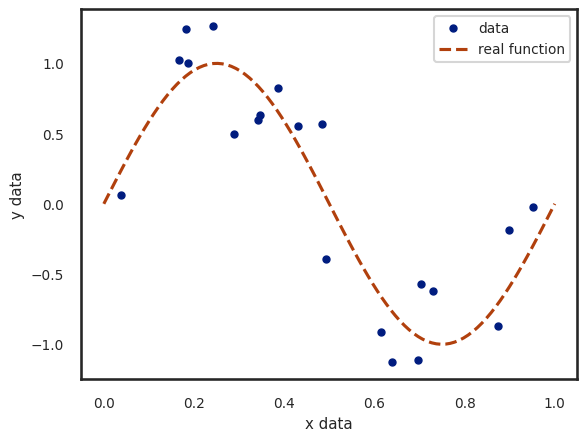

In [4]:
sns.set_style('white')
sns.set_context('talk', font_scale=0.6)
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = data.set_index('x')['y'].plot(ls='', marker='o', markersize=5, label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')

ax.legend()
ax.set(xlabel='x data', ylabel='y data');


In [5]:
#Trying to predict with a straight line

x1 = data[['x']].to_numpy()
y1 = data['y'].to_numpy()

regressor1 = LinearRegression()
regressor1.fit(x1,y1)

y_pred1 = regressor1.predict(x1)
y_pred1 = regressor1.predict(x1)

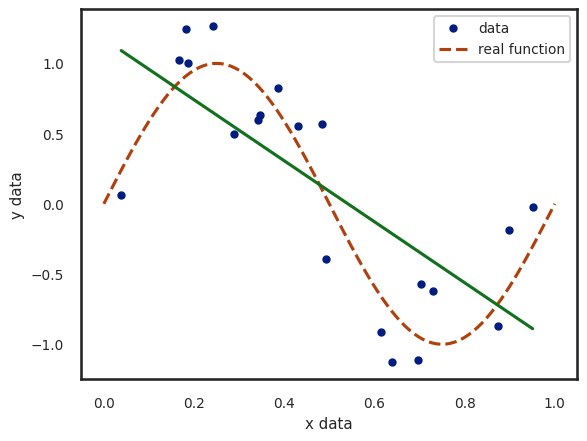

In [6]:
sns.set_style('white')
sns.set_context('talk', font_scale=0.6)
sns.set_palette('dark')

# Plot of the noisy (sparse)
ax = data.set_index('x')['y'].plot(ls='', marker='o', markersize=5, label='data')
ax.plot(X_real, Y_real, ls='--', marker='', label='real function')
ax.plot(x1,y_pred1)

ax.legend()
ax.set(xlabel='x data', ylabel='y data');


## Polynomial features

* Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
* Fit this data using linear regression. 
* Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.

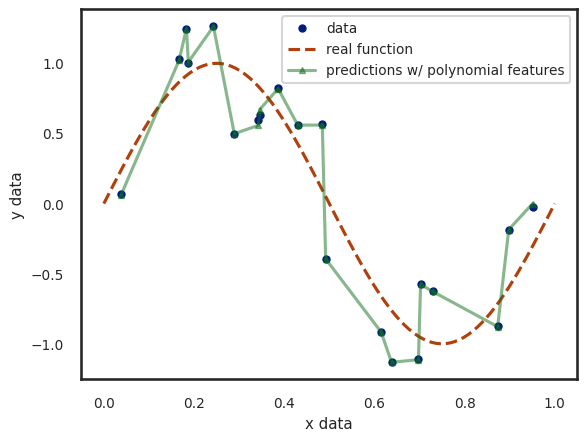

In [7]:
# Setup the polynomial features
degree = 20
pf = PolynomialFeatures(degree)
lr = LinearRegression()

# Extract the X- and Y- data from the dataframe 
X_data = data[['x']].to_numpy()
Y_data = data['y'].to_numpy()

# Create the features and fit the model
X_poly = pf.fit_transform(X_data)
lr = lr.fit(X_poly, Y_data)
Y_pred = lr.predict(X_poly)

# Plot the result
plt.plot(X_data, Y_data, marker='o', markersize=5, ls='', label='data', alpha=1)
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, marker='^', markersize=5, alpha=.5, label='predictions w/ polynomial features')
plt.legend(loc='upper right')
ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');


In [8]:
#X_data

In [9]:
#X_poly

Example of polynomial combinations

In [45]:
temp_data = [[1, 2,3]]
pf2=PolynomialFeatures(2)
temp_poly = pf2.fit_transform(temp_data)
temp_poly #Results in all the polynomial combinatios [1, a, b, c, a^2, ab, ac, b^2, bc, c^2]

array([[1., 1., 2., 3., 1., 2., 3., 4., 6., 9.]])

## Regularization with Ridge and Lasso Regression

* Lamba/alpha value used for Ridge ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001). 


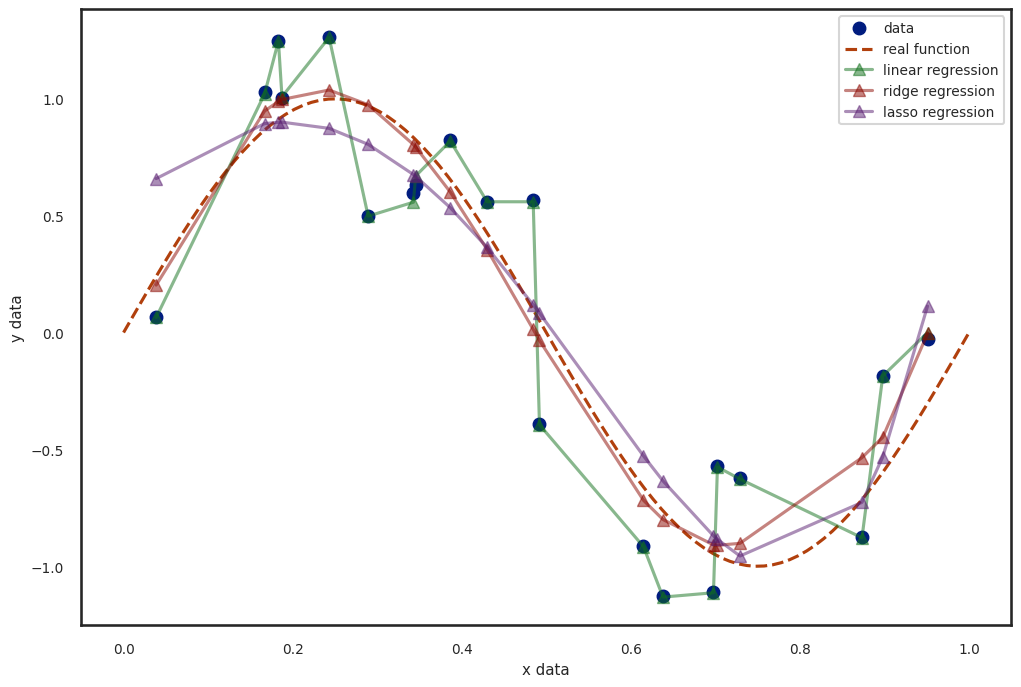

In [11]:
# Mute the sklearn warning about regularization
import warnings
warnings.filterwarnings('ignore', module='sklearn')

# The ridge regression model
rr = Ridge(alpha=0.0001)
rr = rr.fit(X_poly, Y_data)
Y_pred_rr = rr.predict(X_poly)

# The lasso regression model
lassor = Lasso(alpha=0.001)
lassor = lassor.fit(X_poly, Y_data)
Y_pred_lr = lassor.predict(X_poly)

# The plot of the predicted values
plt.figure(figsize=(12,8)) #Size in inches
plt.plot(X_data, Y_data, marker='o', ls='', label='data')
plt.plot(X_real, Y_real, ls='--', label='real function')
plt.plot(X_data, Y_pred, label='linear regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_rr, label='ridge regression', marker='^', alpha=.5)
plt.plot(X_data, Y_pred_lr, label='lasso regression', marker='^', alpha=.5)

plt.legend()

ax = plt.gca()
ax.set(xlabel='x data', ylabel='y data');

In [12]:
# let's look at the absolute value of coefficients for each model

coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = rr.coef_.ravel()
coefficients['lasso regression'] = lassor.coef_.ravel()
coefficients = coefficients.map(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.786341e+13,4.545873,1.017710
std,6.005692e+13,5.094313,2.556141
min,1.613907e+07,0.000000,0.000000
25%,3.407774e+12,2.010479,0.000000
50%,3.625543e+13,3.259910,0.000000
75%,1.068105e+14,4.539545,0.000000
max,1.650270e+14,23.075093,10.423510


In [13]:
coefficients.shape

(21, 3)

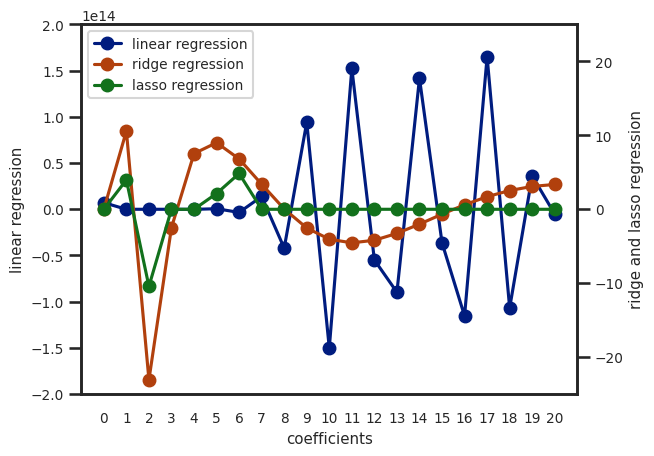

In [14]:
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(), 
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(rr.coef_.ravel(), 
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lassor.coef_.ravel(), 
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));

# Regularization real case example (Ames House Dataset)

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques), which is based on housing prices in Ames, Iowa.

* Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
* Split the data into train and test sets. 
* Log transform skewed features. 
* Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.

In [15]:
filepath = 'Ames_Housing_Sales.csv'
data = pd.read_csv(filepath)

In [16]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,NaN,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,NaN,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,NaN,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,NaN,3,1Fam,NaN,NaN,0.0,0.0,...,0.0,Pave,7,953.0,AllPub,0.0,1999,2000,2007,175000.0
1375,2073.0,0.0,0.0,NaN,3,1Fam,TA,No,790.0,163.0,...,0.0,Pave,7,1542.0,AllPub,349.0,1978,1988,2010,210000.0
1376,1188.0,1152.0,0.0,NaN,4,1Fam,Gd,No,275.0,0.0,...,0.0,Pave,9,1152.0,AllPub,0.0,1941,2006,2010,266500.0
1377,1078.0,0.0,0.0,NaN,2,1Fam,TA,Mn,49.0,1029.0,...,0.0,Pave,5,1078.0,AllPub,366.0,1950,1996,2010,142125.0


Create a list of categorial data and one-hot encode using Pandas one-hot encoder (`get_dummies`).

In [17]:
# Get a Pd.Series consisting of all the string categoricals
one_hot_encode_cols = data.dtypes[data.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist()  # list of categorical fieldsa

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
for col in one_hot_encode_cols:
    data[col] = pd.Categorical(data[col])

# Do the one hot encoding
data = pd.get_dummies(data, columns=one_hot_encode_cols)

Split the data in train and test data sets.

In [18]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,856.0,854.0,0.0,3,706.0,0.0,1,0,150.0,0.0,...,False,False,False,False,False,True,False,True,True,False
1,1262.0,0.0,0.0,3,978.0,0.0,0,1,284.0,0.0,...,False,False,False,False,False,True,False,True,True,False
2,920.0,866.0,0.0,3,486.0,0.0,1,0,434.0,0.0,...,False,False,False,False,False,True,False,True,True,False
3,961.0,756.0,0.0,3,216.0,0.0,1,0,540.0,272.0,...,False,False,False,False,False,True,False,True,True,False
4,1145.0,1053.0,0.0,4,655.0,0.0,1,0,490.0,0.0,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1374,953.0,694.0,0.0,3,0.0,0.0,0,0,953.0,0.0,...,False,False,False,False,False,True,False,True,True,False
1375,2073.0,0.0,0.0,3,790.0,163.0,1,0,589.0,0.0,...,False,False,False,False,False,True,False,True,True,False
1376,1188.0,1152.0,0.0,4,275.0,0.0,0,0,877.0,0.0,...,False,False,False,False,False,True,False,True,True,False
1377,1078.0,0.0,0.0,2,49.0,1029.0,1,0,0.0,112.0,...,False,False,False,False,False,True,False,True,True,False


In [19]:
#save encoded csv to visualize
data.to_csv('encoded_ames_houses.csv')

In [20]:
train, test = train_test_split(data, test_size=0.3, random_state=42)

There are a number of columns that have skewed features--a log transformation can be applied to them. Note that this includes the SalePrice, our predictor. However, let's keep that one as is.

In [21]:
# Create a list of float colums to check for skewing
mask = data.dtypes == float
float_cols = data.columns[mask]

In [22]:
skew_limit = 0.75
skew_vals = train[float_cols].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
MiscVal,26.915364
PoolArea,15.777668
LotArea,11.501694
LowQualFinSF,11.210638
3SsnPorch,10.150612
ScreenPorch,4.599803
BsmtFinSF2,4.466378
EnclosedPorch,3.218303
LotFrontage,3.138032
MasVnrArea,2.492814


Transform all the columns where the skew is greater than 0.75, excluding "SalePrice".

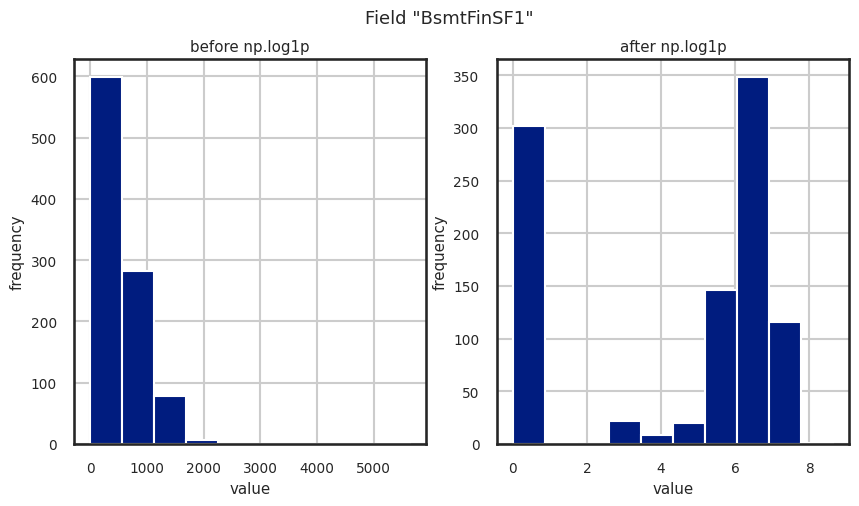

In [23]:
# OPTIONAL: Let's look at what happens to one of these features, when we apply np.log1p visually.

field = "BsmtFinSF1"
fig, (ax_before, ax_after) = plt.subplots(1, 2, figsize=(10, 5))
train[field].hist(ax=ax_before)
train[field].apply(np.log1p).hist(ax=ax_after)
ax_before.set(title='before np.log1p', ylabel='frequency', xlabel='value')
ax_after.set(title='after np.log1p', ylabel='frequency', xlabel='value')
fig.suptitle('Field "{}"'.format(field));
# a little bit better

In [24]:
#Replace values with the log values to remove skew
pd.options.mode.chained_assignment = None

for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    train[col] = np.log1p(train[col])
    test[col]  = test[col].apply(np.log1p)  # same thing

In [25]:
feature_cols = [x for x in train.columns if x != 'SalePrice']
X_train = train[feature_cols].to_numpy()
y_train = train['SalePrice'].to_numpy()

X_test  = test[feature_cols].to_numpy()
y_test  = test['SalePrice'].to_numpy()

## Linear Regression and Estimating RMSE


* Fit a basic linear regression model
* print the root-mean-squared error for this model
* plot the predicted vs actual sale price based on the model.  

In [26]:
y_test_df = pd.DataFrame(y_test)

In [27]:
y_test_df.describe()

,0
count,414.000000
mean,183217.062802
std,77791.570030
min,55993.000000
25%,129925.000000
50%,162950.000000
75%,219875.000000
max,582933.000000


In [28]:
#Outliers that were causing issues
X_test[276] = X_test[275]
X_test[312] = X_test[311]

In [29]:
linearRegression = LinearRegression()

linearRegression.fit(X_train, y_train)

linearRegression_rmse = root_mean_squared_error(y_test, linearRegression.predict(X_test))

print(linearRegression_rmse)

102610.22003240137


In [30]:
y_test[310:315]

array([109000., 372402., 274970., 173000., 191000.])

In [31]:
linearRegression.predict(X_test)[311:313]

array([364899.62858567, 364899.62858567])

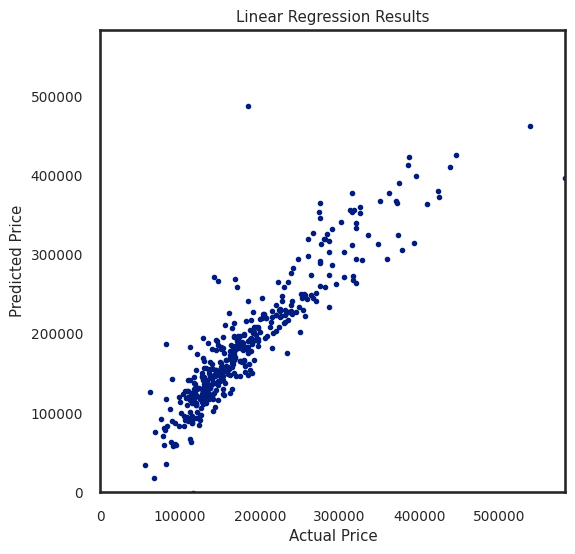

In [32]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

ax.plot(y_test, linearRegression.predict(X_test), 
         marker='o', ls='', ms=3.0)

lim = (0, y_test.max())

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       xlim=lim,
       ylim=lim,
       title='Linear Regression Results');

## Ridge Regression (L2)

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

* Use $$[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
* Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.

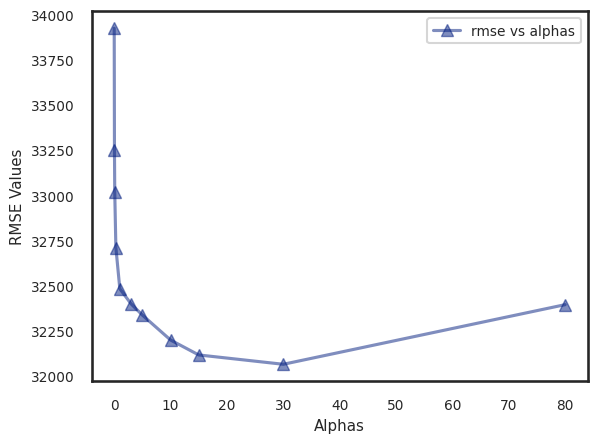

In [33]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

rmse_values=[]

for al in alphas:
    rr = Ridge(alpha=al).fit(X_train, y_train)
    rmse_values.append(root_mean_squared_error(y_test, rr.predict(X_test)))
    
plt.plot(alphas, rmse_values, label='rmse vs alphas', marker='^', alpha=.5)
plt.xlabel('Alphas')
plt.ylabel('RMSE Values')
plt.legend()
plt.show()


### RidgeCV (Cross Validation)

In [34]:
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]

ridgeCV = RidgeCV(alphas=alphas, 
                  cv=4).fit(X_train, y_train)

ridgeCV_rmse = root_mean_squared_error(y_test, ridgeCV.predict(X_test))

print(ridgeCV.alpha_, ridgeCV_rmse)

15.0 32115.755169842098


## LassoCV and ElasticNetCV


Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

* Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
* Repeat this with the Elastic net model.
* Compare the results via table and/or plot.

Use the following alphas:  
`[1e-5, 5e-5, 0.0001, 0.0005]`

In [35]:
alphas2 = np.array([1e-5, 5e-5, 0.0001, 0.0005, 0.0008, 0.001])

lassoCV = LassoCV(alphas=alphas2,
                  max_iter=50000,
                  cv=3).fit(X_train, y_train)

lassoCV_rmse = root_mean_squared_error(y_test, lassoCV.predict(X_test))

print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower

0.001 35654.168979687085


Lasso regression tends to remove coefficients and make those zero. We can determine how many of these features remain non-zero.

In [36]:
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))

Of 283 coefficients, 262 are non-zero with Lasso.


Elastic net, takes both Ridge and Lasso penalizations and combine those in one. Using the same alphas as in Lasso, and l1_ratios between 0.1 and 0.9

In [37]:
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alphas2, 
                            l1_ratio=l1_ratios,
                            max_iter=1000).fit(X_train, y_train)
elasticNetCV_rmse = root_mean_squared_error(y_test, elasticNetCV.predict(X_test))

print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)

0.001 0.1 32499.743867418645


Comparing the RMSE calculation from all models is easiest in a table.

In [38]:
rmse_vals = [linearRegression_rmse, ridgeCV_rmse, lassoCV_rmse, elasticNetCV_rmse]

labels = ['Linear', 'Ridge', 'Lasso', 'ElasticNet']

rmse_df = pd.Series(rmse_vals, index=labels).to_frame()
rmse_df.rename(columns={0: 'RMSE'}, inplace=1)
rmse_df

,RMSE
Linear,102610.220032
Ridge,32115.755170
Lasso,35654.168980
ElasticNet,32499.743867


We can also make a plot of actual vs predicted housing prices as before.

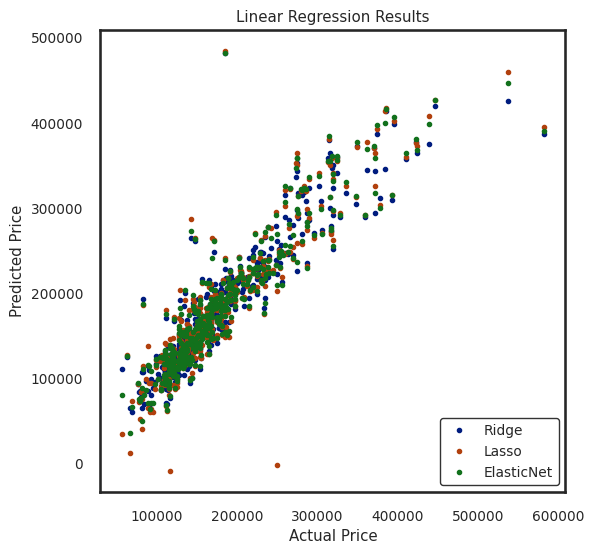

In [39]:
f = plt.figure(figsize=(6,6))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridgeCV, lassoCV, elasticNetCV]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test), 
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price', 
       ylabel='Predicted Price', 
       title='Linear Regression Results');